In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

savefig = False
fig_scale = 1.5
if savefig:
    fig_scale = 1
text_width = 3.25  # inches (single column width)
fig_width = text_width*fig_scale
fig_height = 0.8 * fig_width  # for standard plots
figsize = (fig_width,fig_height)
width_2_subplot = fig_width/2 + 0.25  # for side-by-side subplots
height_2_subplot = 0.75 * width_2_subplot
height_cbar_2_subplot = 0.75 * width_2_subplot
# plt.rcParams.update({
#     'font.size': 10,
#     'axes.labelsize': 10,
#     'axes.titlesize': 10,
#     'xtick.labelsize': 7,
#     'ytick.labelsize': 7,
#     'legend.fontsize': 7,
#     'axes.spines.top': False,
#     'axes.spines.right': False,
#     'figure.constrained_layout.use': True,
#     'figure.autolayout': False,
#     'axes.xmargin': 0.02,
#     'axes.ymargin': 0.02,
#     'figure.subplot.left': 0.2,
#     'figure.subplot.right': 0.97,
#     'figure.subplot.bottom': 0.12,
#     'figure.subplot.top': 0.92,
#     'figure.dpi': 100,
#     'savefig.dpi': 300,
# })

plt.style.use('seaborn-v0_8')
# plt.style.use('default')

# Pulsars Dataset

**Q** "assess whether the database can be used to predict labels for a larger dataset." 

### Plenimanary look at the data

In [2]:
filename = "pulsars.csv"
raw_df = pd.read_csv(filename)

# Top 5 rows
display(raw_df.head(5))

# Info about the columns
display(raw_df.info())

# Statistical description
display(raw_df.describe())

# Information in the labelling column
print(raw_df['Class label (0 = negative, 1 = positive)'].value_counts())

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,"Class label (0 = negative, 1 = positive)"
0,109.640625,49.017652,0.137636,-0.256700,1.508361,12.072901,13.367926,223.438419,0
1,100.851562,51.743522,0.393837,-0.011241,2.841137,21.635778,8.302242,71.584369,0
2,112.718750,50.301270,0.279391,-0.129011,8.281773,37.810012,4.691827,21.276210,0
3,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
4,107.906250,48.084145,0.460847,0.296510,1.993311,13.841070,9.969395,128.744717,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                1748 non-null   float64
 1   Standard deviation of the integrated profile  1748 non-null   float64
 2   Excess kurtosis of the integrated profile     1748 non-null   float64
 3   Skewness of the integrated profile            1748 non-null   float64
 4   Mean of the DM-SNR curve                      1748 non-null   float64
 5   Standard deviation of the DM-SNR curve        1748 non-null   float64
 6   Excess kurtosis of the DM-SNR curve           1748 non-null   float64
 7   Skewness of the DM-SNR curve                  1748 non-null   float64
 8   Class label (0 = negative, 1 = positive)      1748 non-null   int64  
dtypes: float64(8), int64(1)
memory usage: 123.0 KB


None

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,"Class label (0 = negative, 1 = positive)"
count,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000,1748.000000
mean,110.505573,46.549606,0.507882,1.950541,12.449351,26.488414,8.331407,107.198931,0.085812
std,26.310155,6.999016,1.137468,6.882728,28.452940,19.727958,4.660181,117.395027,0.280167
min,6.500000,25.695250,-1.581258,-1.668540,0.213211,7.370432,-2.191995,-1.976976,0.000000
25%,100.660156,42.719917,0.032573,-0.179097,1.908027,14.392421,5.737298,34.126920,0.000000
50%,115.421875,46.905897,0.228778,0.190978,2.831522,18.483539,8.436697,81.283884,0.000000
75%,126.746094,50.826484,0.484039,0.853804,5.561246,28.753780,10.727922,140.085354,0.000000
max,184.460938,90.250557,8.069522,68.101622,201.534281,110.642211,34.539844,1191.000837,1.000000


Class label (0 = negative, 1 = positive)
0    1598
1     150
Name: count, dtype: int64


The first 8 columns are continuous descriptive data on the pulsar, followed by the classification column, with 2 descrete values (0 = negative, 1 = positive). There is no missing data.

The assigned class labels means a supervised machine learning algorithm can be used in order to classify columns. The data set is also large enough (1748), so a test, train, split can be implemented allowing for testing of the model. 

### Correlation analysis

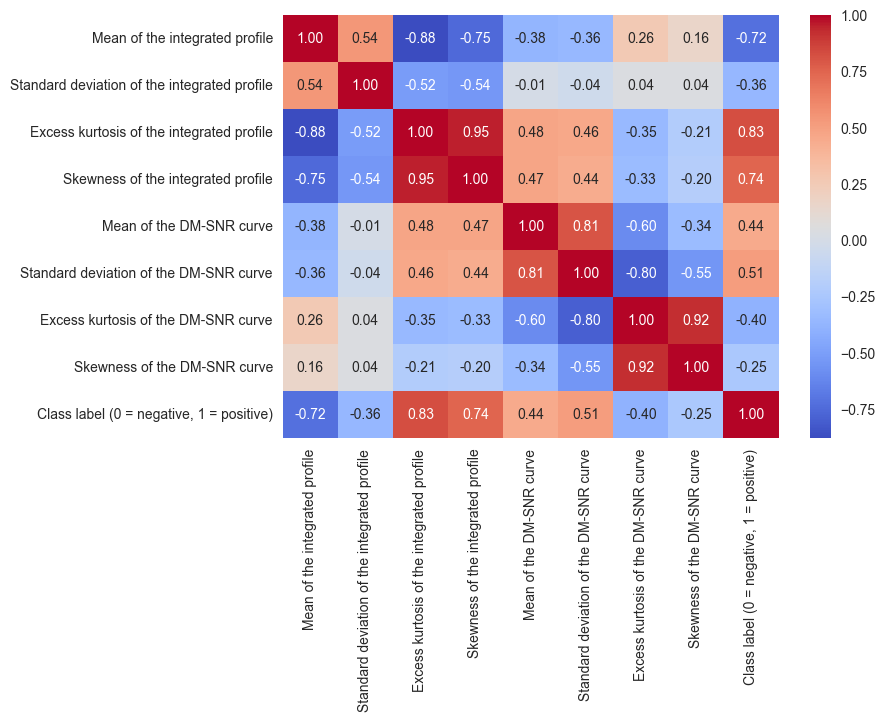

'Excess kurtosis of the integrated profile' and 'Skewness of the integrated profile' have a correlation of 0.95
'Skewness of the integrated profile' and 'Excess kurtosis of the integrated profile' have a correlation of 0.95
'Excess kurtosis of the DM-SNR curve' and 'Skewness of the DM-SNR curve' have a correlation of 0.92
'Skewness of the DM-SNR curve' and 'Excess kurtosis of the DM-SNR curve' have a correlation of 0.92


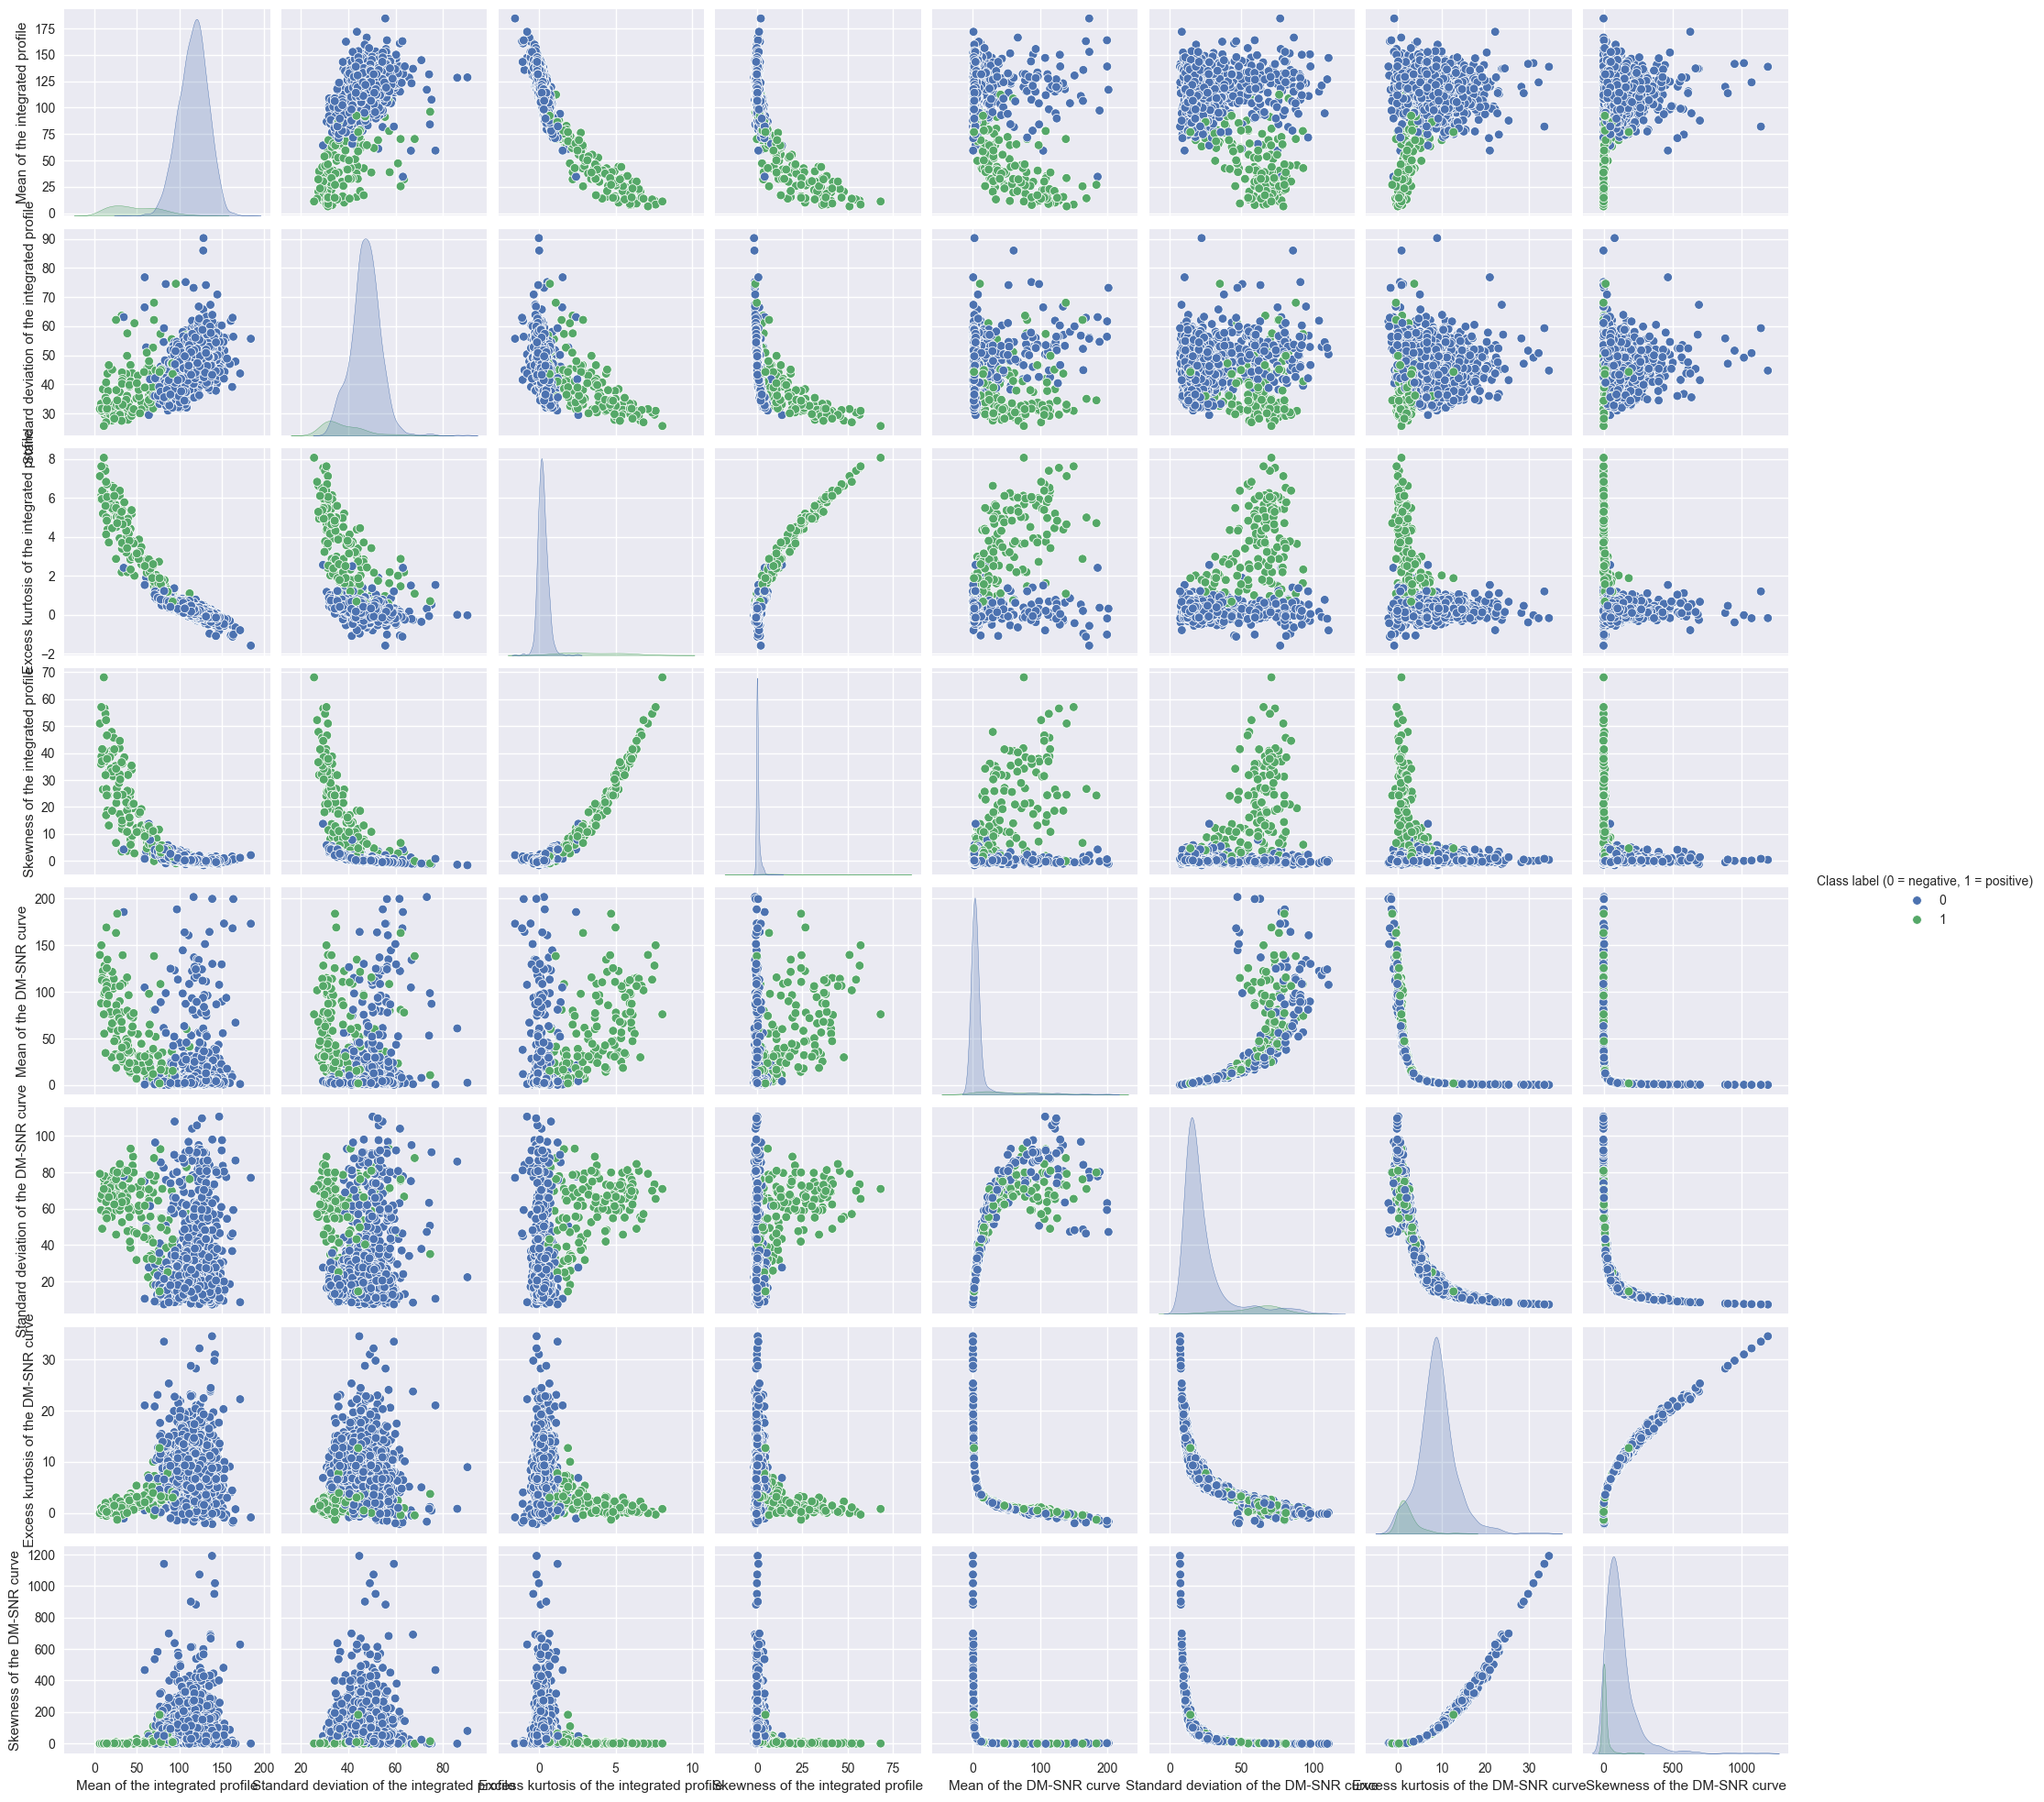

In [3]:
corr_df = raw_df.corr()
target_col = 'Class label (0 = negative, 1 = positive)'

# fig,ax = plt.subplots(1,1, figsize = figsize)
sns.heatmap(corr_df, annot = True, fmt = ".2f", cmap = "coolwarm")

plt.show()

corr_filter = corr_df.abs() > 0.9
highly_correlated_cols = []
for col1 in corr_df.columns:
    for col2 in corr_df.columns:
        if col1 != col2 and corr_filter.loc[col1, col2]:
            print(f"'{col1}' and '{col2}' have a correlation of {corr_df.loc[col1, col2]:.2f}")
            highly_correlated_cols.append(col1)

sns.pairplot(raw_df, hue = target_col)

Dropped col: 'Class label (0 = negative, 1 = positive)'


<Axes: >

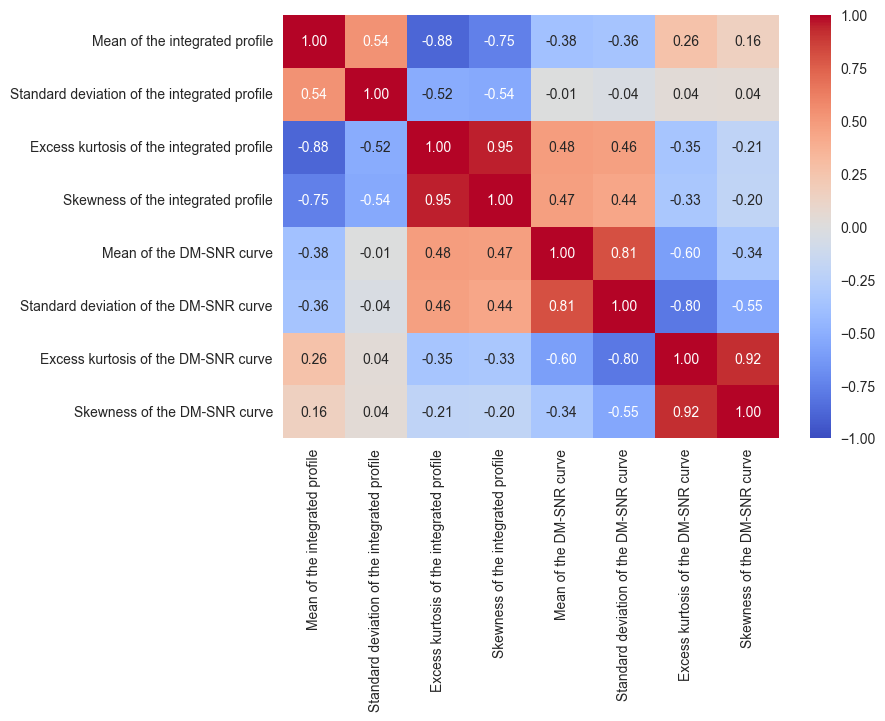

In [4]:
df_dropped1 = raw_df.drop('Class label (0 = negative, 1 = positive)',axis=1)
target_col = 'Class label (0 = negative, 1 = positive)'
print(f"Dropped col: 'Class label (0 = negative, 1 = positive)'")

corr_dropped = df_dropped1.corr()

sns.heatmap(corr_dropped, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

`Excess kurtosis of the integrated profile` and `Skewness of the integrated profile` are highly correlated and so are `Excess kurtosis of the DM-SNR curve` and `Skewness of the DM-SNR curve`, with correlations over 0.9. one column for each pairing can be dropped to reduce the dimensionallity, this correlation occurs because  correlation as Excess kurtosis and Skewness both descriptors of the shape of the pulsar

#### Normalising and combining columns

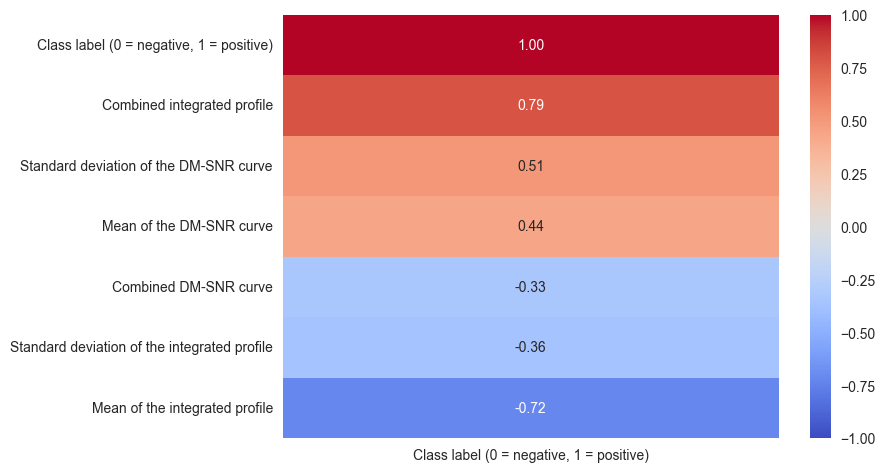

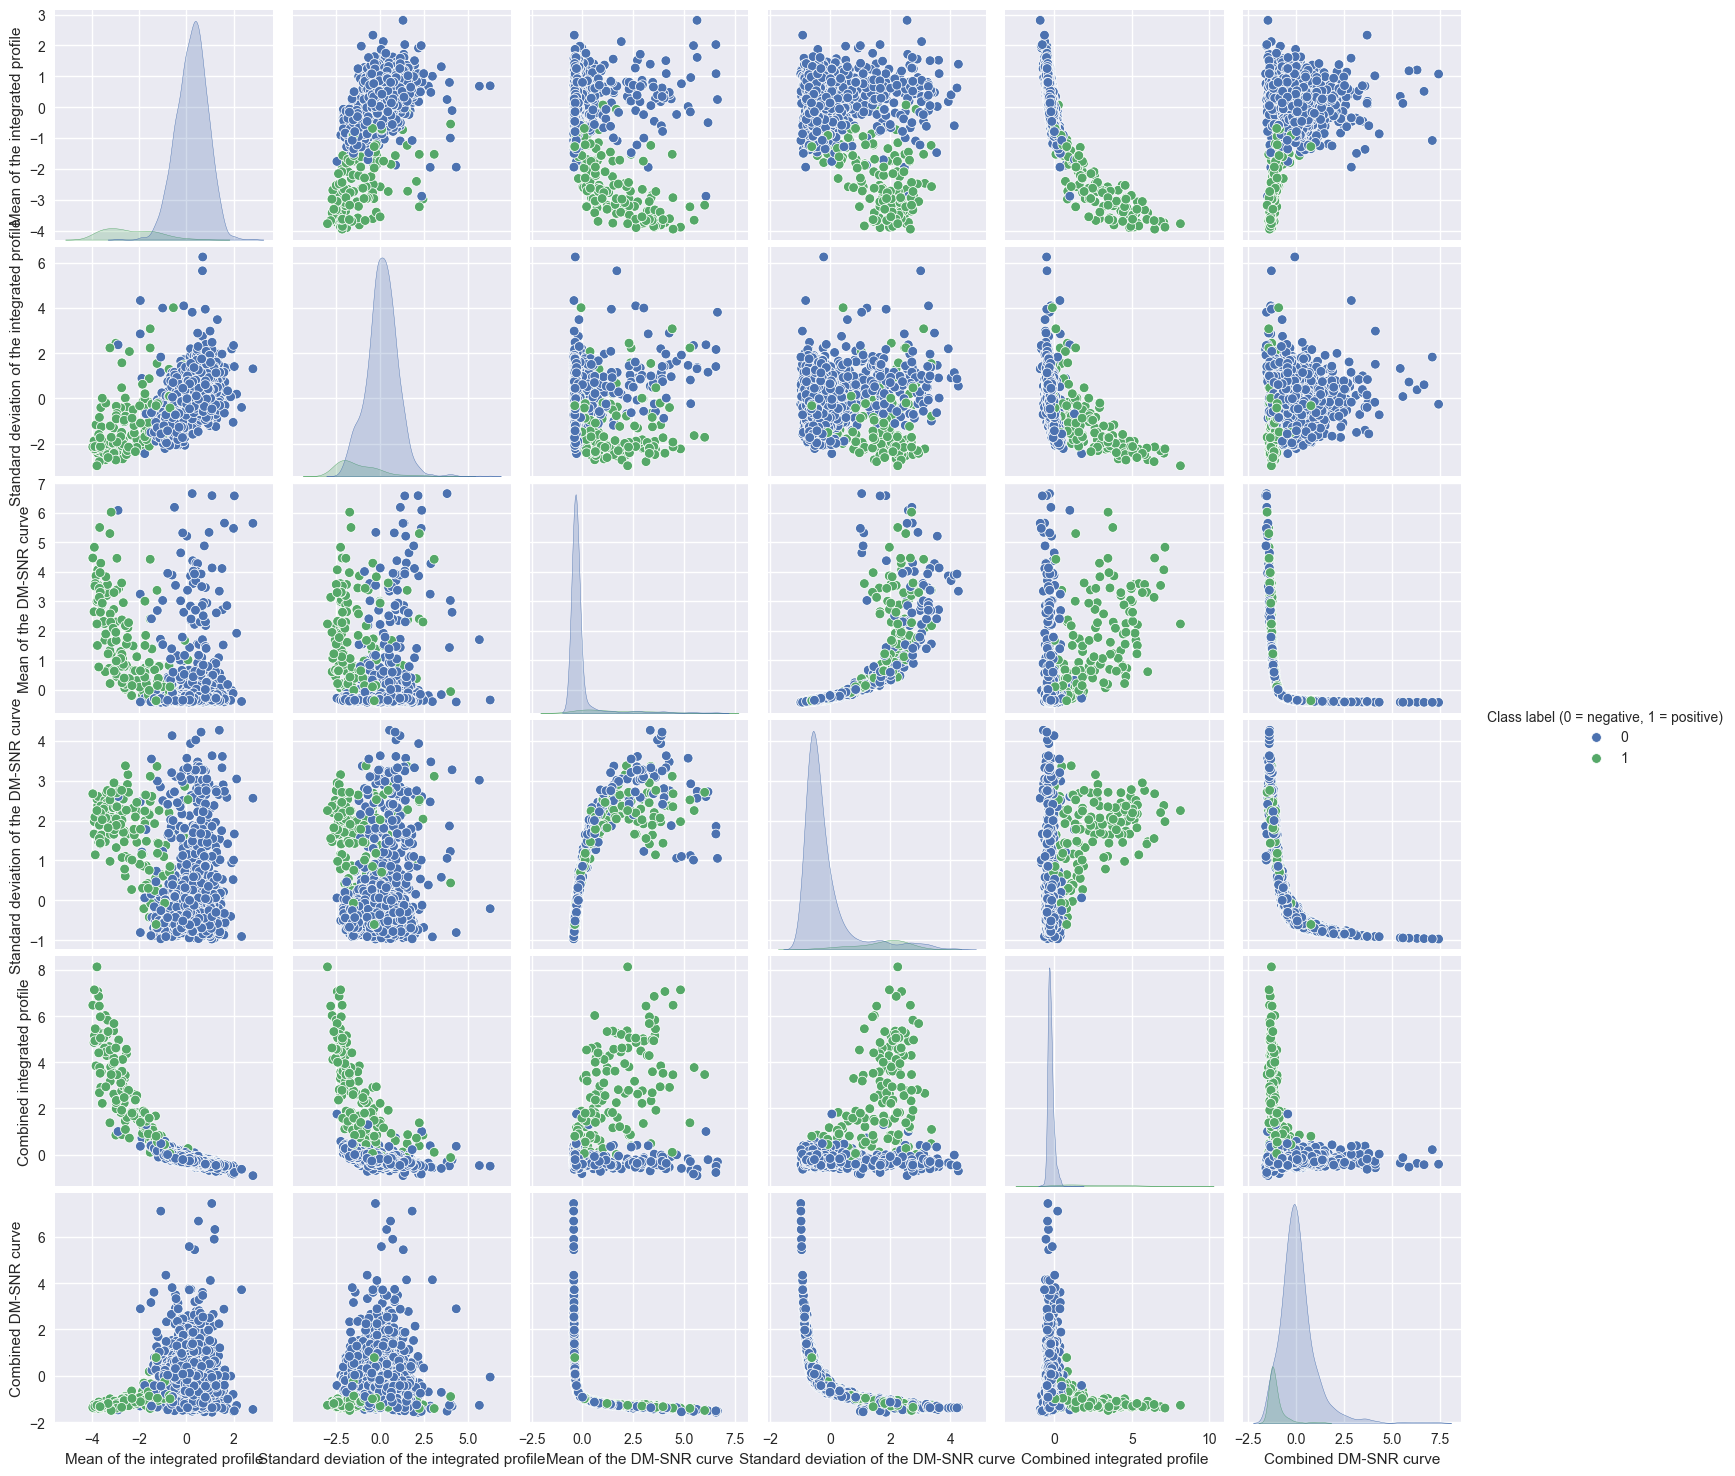

In [5]:
scalar = StandardScaler()
normalised_df = pd.DataFrame(scalar.fit_transform(df_dropped1))
df_scale = pd.DataFrame(scalar.transform(df_dropped1), columns=df_dropped1.columns)
df_scale[target_col] = raw_df[target_col]

df_scale["Combined integrated profile"] = (
    df_scale["Excess kurtosis of the integrated profile"] + 
    df_scale["Skewness of the integrated profile"]
)/2

df_scale["Combined DM-SNR curve"] = (
    df_scale["Excess kurtosis of the DM-SNR curve"] + 
    df_scale["Skewness of the DM-SNR curve"]
)/2
df_scale_combined = df_scale.drop(highly_correlated_cols,axis=1)

# Correlation
scale_combined_corr = df_scale_combined.corr()

sns.heatmap(scale_combined_corr[[target_col]].sort_values(by=target_col, ascending=False), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
# Relationships
sns.pairplot(df_scale_combined, hue= target_col)

In [6]:
print(df_scale_combined.columns)

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Mean of the DM-SNR curve', 'Standard deviation of the DM-SNR curve',
       'Class label (0 = negative, 1 = positive)',
       'Combined integrated profile', 'Combined DM-SNR curve'],
      dtype='object')


The most distinct split between the labels appears in columns `Mean of the integrated profile` and `Combined integrated profile` columns, with almost a clear split. The correlation matrix also confirms this with `-0.72` and `0.79` correlations with the label column, meaning they would be the best distinciton columns. These variables are most likly to have the largest impact on the model.

Algorithms that might work to classify data:
 - Binary Logistical Regresson (BLR)
 - SVM
 - decision trees 
 - random forests
 - K neares neighbours, (Knn)

**BLR** is not appropriate as there is complex separation between other column. The linear decision would struggle with some non linear relationships between variables.

**SVM** could work as in the distinct separations `Mean of the integrated profile` and `Combined integrated profile` columns a hyperplane could be fitted. However there is often overlap between variables, meaning it would produce false identifications, especially for the other variables where the distinction isn't as apparent.

**Knn** would work on some features like `Mean of the DM-SNR curve`, `Standard deviation of the DM-SNR curve` where there is distinct regions and can handle nonlinearity effectivly. However the curse of dimensionallity would effect this as there are other relationships between variables that are less distinct. To do this method more preprossing would need to be done to reduce dimensionality, like a PCA or remove lowly correlated columns. 

**Random forests** would be the best options due to the ability of this algorithm to capture the simple and complex distinctions seen when comparing variables, still working with the number of variables in our data. This is the method I will be choosing to categorise the data

## Preparing Random Forest

#### Splitting into test and train datasets

`X` is the feature matrix and `y` is target variable. `stratify=y` used to ensure a balanced spilt of data, reducing any chances of bias. Without it there may be too many of either `1` or `0` labels, lost likely having too little `1` labels as there is only 150 of them compared to the 1598 `0` labels. This ensures that the ratio of `1` to `0` stays the same for all split data.


In [7]:
X = df_scale_combined.drop(columns=target_col)
y = df_scale_combined[target_col]

# X = df_scale.drop(columns=target_col)
# y = df_scale[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

### Creating a Decision tree

In [ ]:
max_depth = 3
Dec_Tree_model = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
Dec_Tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

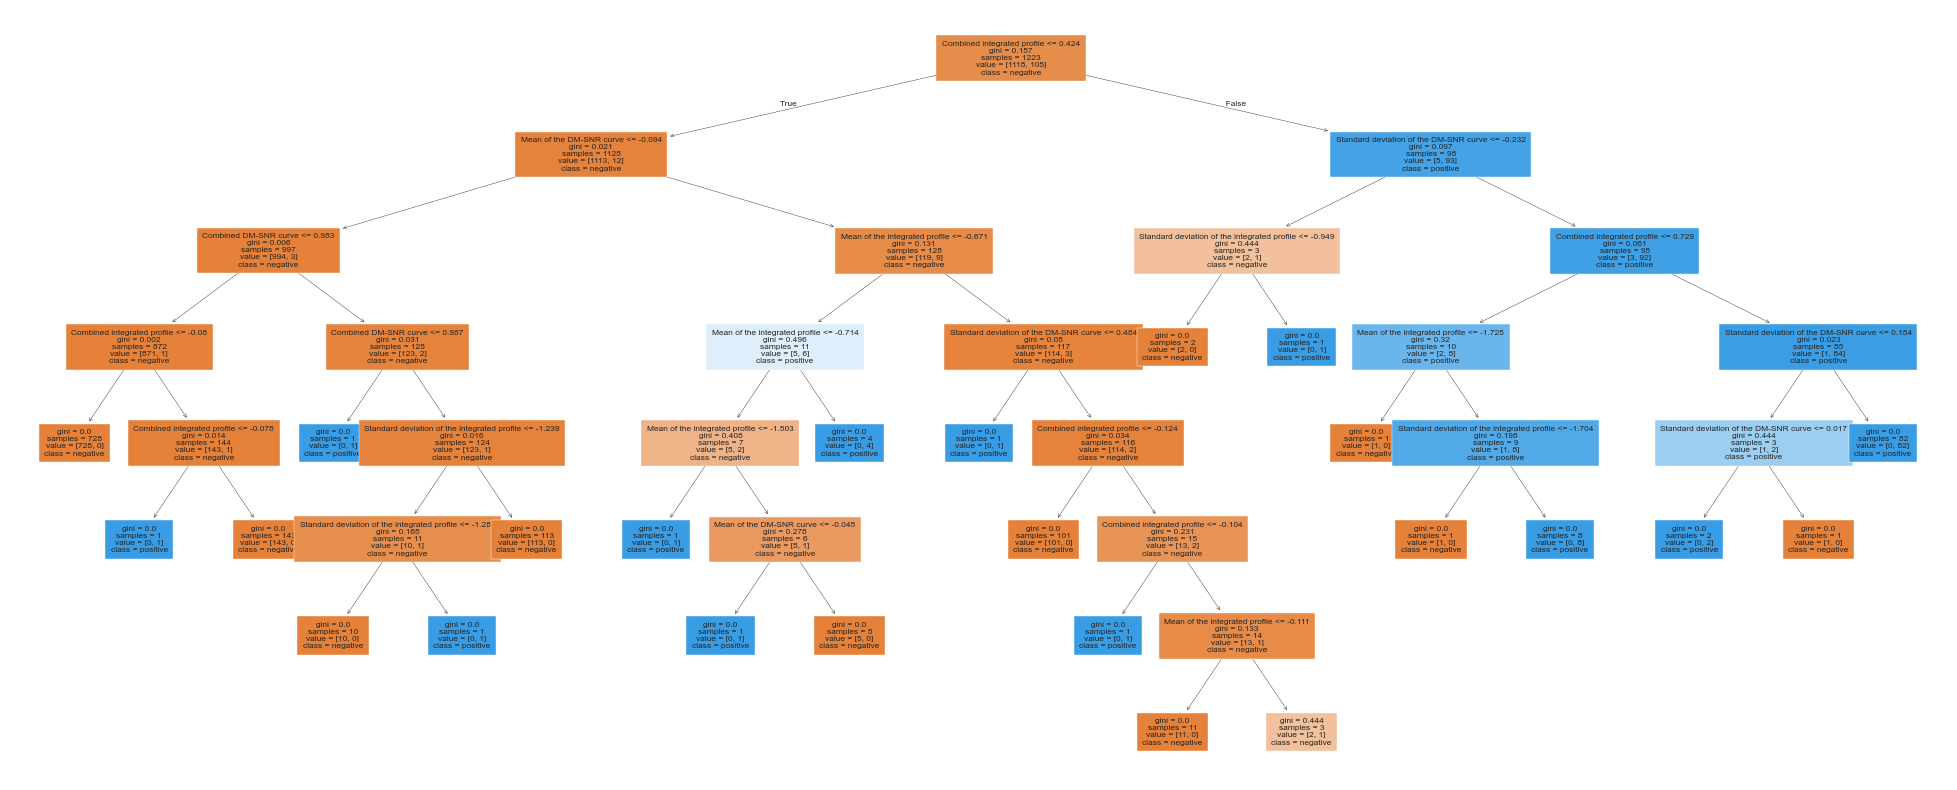

In [21]:
Dec_Tree_yPred = Dec_Tree_model.predict(X_test)
plt.figure(figsize=(25,10))
plot_tree(
    Dec_Tree_model, 
    feature_names=X.columns, 
    class_names=["negative", "positive"], 
    filled=True, 
    fontsize=6  # Adjust the font size for readability
)
plt.show()

In [37]:
max_depth = 2
Dec_Tree_model = DecisionTreeClassifier(criterion="gini", max_depth=max_depth, random_state=42)
Dec_Tree_model.fit(X_train, y_train)
Dec_Tree_yPred = Dec_Tree_model.predict(X_test)
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, Dec_Tree_yPred))
print("Classification Report:\n", classification_report(y_test, Dec_Tree_yPred))

Decision Tree Model Performance:
Accuracy: 0.979047619047619
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       480
           1       0.93      0.82      0.87        45

    accuracy                           0.98       525
   macro avg       0.95      0.91      0.93       525
weighted avg       0.98      0.98      0.98       525



In [11]:
from sklearn.model_selection import cross_val_score

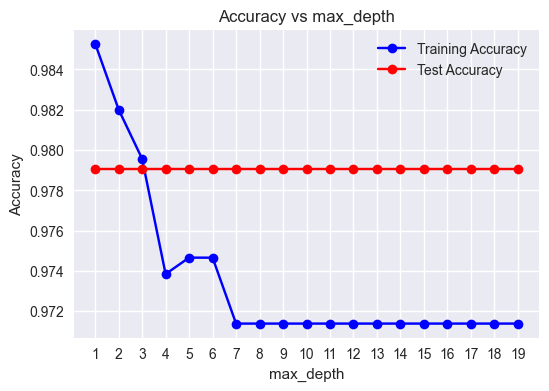

In [23]:
# Splitting on the combined dataset
X = df_scale_combined.drop(columns=target_col)
y = df_scale_combined[target_col]

# Testing without combining
# X = df_scale.drop(columns=target_col)
# y = df_scale[target_col]

# Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Range of max_depth values
max_depths = range(1, 20)
mean_train_scores = []
mean_test_scores = []

# calc cross-validation scores for each depth
for depth in max_depths:
    dt = DecisionTreeClassifier(criterion="gini", max_depth=depth, random_state=42)
    
    # Training scores
    train_scores = cross_val_score(dt, X_train, y_train, cv=5)
    mean_train_scores.append(np.mean(train_scores))
    
    # Test scores
    test_scores = cross_val_score(dt, X_test, y_test, cv=5)
    mean_test_scores.append(np.mean(test_scores))

# Plot
plt.figure(figsize=(6, 4))
plt.plot(max_depths, mean_train_scores, 'o-', color='blue', label='Training Accuracy')
plt.plot(max_depths, mean_test_scores, 'o-', color='red', label='Test Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.xticks(ticks=range(1, 20))
plt.legend()
plt.title('Accuracy vs max_depth')
plt.grid(True)
plt.show()

This shows an unusual trend where the accuracy decreases as the depth of the tree increases. By changing the `random_state` variable, the shape of both the test and train accuracy graphs change, but it always decreases and then platos at a lower accuracy. The same trend was seen when not using the combined data, however the accuracys seen are lower.

The best tree size would be a `max_depth` of around 1-3, to maintain accuracy without underfitting. By rerunning the classificaiton report cell `max_depth = 2` was found to produce the highest precision for predicting pulsars (`1`s)

Mean of the integrated profile: 0.0046
Standard deviation of the integrated profile: 0.0304
Mean of the DM-SNR curve: 0.0951
Standard deviation of the DM-SNR curve: 0.0000
Combined integrated profile: 0.8373
Combined DM-SNR curve: 0.0327


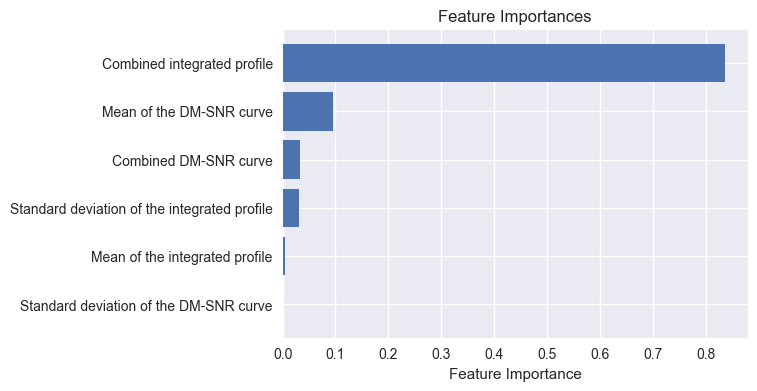

In [61]:
model = DecisionTreeClassifier(criterion="entropy", max_depth=5, random_state=42)
model.fit(X_train, y_train)

for feature, importance in zip(X_train.columns, model.feature_importances_):
    print(f"{feature}: {importance:.4f}")

importances = model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot
plt.figure(figsize=(6, 4))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()

This feature importance demonstrates that the integrated profile is the most important variable in the tree as expected. The others have a much smaller influence on the prediction, with `Mean of the integrated profile` having a suprisingly small influence than expected from the pairplot.

Lets use a Random Forest

## Random Forest Model

In [67]:
Forest_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
Forest_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

Mean of the integrated profile: 0.3374
Standard deviation of the integrated profile: 0.0665
Mean of the DM-SNR curve: 0.0743
Standard deviation of the DM-SNR curve: 0.0592
Combined integrated profile: 0.4208
Combined DM-SNR curve: 0.0419


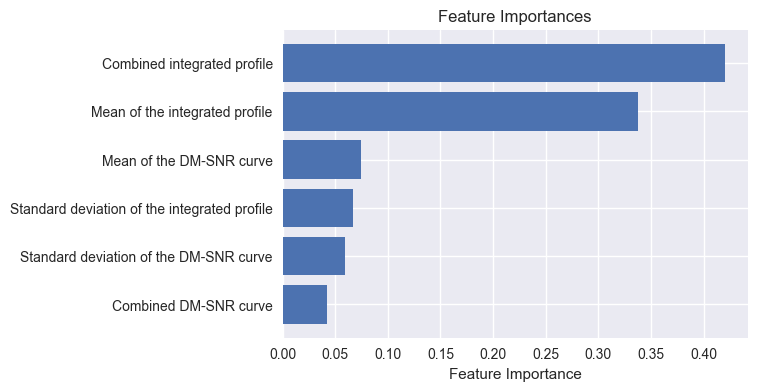

In [68]:
y_pred_Forest = Forest_model.predict(X_test)

for feature, importance in zip(X_train.columns, Forest_model.feature_importances_):
    print(f"{feature}: {importance:.4f}")


importances = Forest_model.feature_importances_

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]
sorted_features = [X_train.columns[i] for i in sorted_indices]
sorted_importances = importances[sorted_indices]

# Plot
plt.figure(figsize=(6, 4))
plt.barh(sorted_features, sorted_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importances')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest importance at the top
plt.show()


This random forest model now shows the importance of each column expected form the pairplot analysis earlier, with `Mean of the integrated profile` having a much higher importance compared to that of 1 decision tree.

In [ ]:
print("Random Forest Model Performance:")
print("Depth: 5")
print("Accuracy:", accuracy_score(y_test, y_pred_Forest))
print("Classification Report:\n", classification_report(y_test, y_pred_Forest))


depth_analysis = True
if depth_analysis:
    # Range of max_depth values
    max_depths = range(1, 13)
    mean_train_scores = []
    mean_test_scores = []

    # calc cross-validation scores for each depth
    for depth in max_depths:
        Forest_model = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
        
        # Training scores
        train_scores = cross_val_score(Forest_model, X_train, y_train, cv=5)
        mean_train_scores.append(np.mean(train_scores))
        
        # Test scores
        test_scores = cross_val_score(Forest_model, X_test, y_test, cv=5)
        mean_test_scores.append(np.mean(test_scores))

    # Plot
    plt.figure(figsize=(6, 4))
    plt.plot(max_depths, mean_train_scores, 'o-', color='blue', label='Training Accuracy')
    plt.plot(max_depths, mean_test_scores, 'o-', color='red', label='Test Accuracy')
    plt.xlabel('max_depth')
    plt.ylabel('Accuracy')
    plt.xticks(ticks=range(1, 20))
    plt.legend()
    plt.title('Accuracy vs max_depth')
    plt.grid(True)
    plt.show()

Random Forest Model Performance:
Depth: 5
Accuracy: 0.9828571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       480
           1       0.91      0.89      0.90        45

    accuracy                           0.98       525
   macro avg       0.95      0.94      0.94       525
weighted avg       0.98      0.98      0.98       525

